In [7]:
import numpy as np
import pandas as pd
import tensorflow
import keras
import os
import glob
from skimage import io
import skimage
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('/content/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Pie Chart')

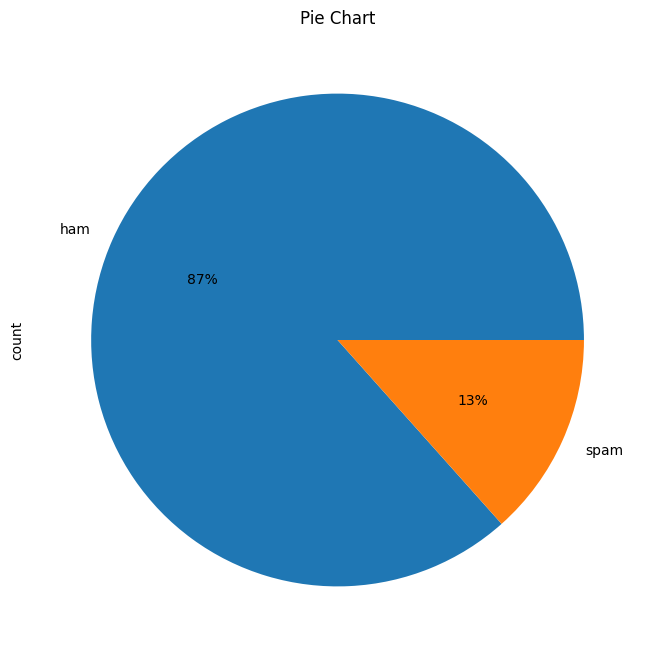

In [6]:
plt.figure(figsize = (8, 8))
data['Category'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('Spam VS Ham')

In [8]:
x = data['Message'].values
y = data['Category'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
#Converting String to Integer
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [10]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

print(classifier.score(x_test, y_test))

0.9820627802690582
